In [1]:
import torch
import torch.nn as nn  
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = torch.linspace(-1,1,200).reshape(-1,1)


In [3]:
y=(np.sin(5*(np.pi*X)))/((5*(np.pi*X)))

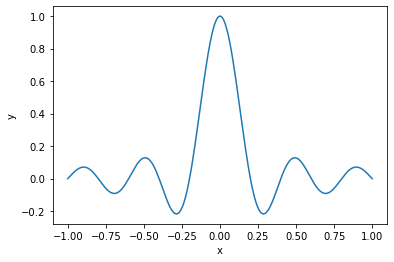

In [4]:
plt.plot(X.numpy(), y.numpy())

plt.ylabel('y')
plt.xlabel('x');

In [5]:
##########################################-----HW 1-1(Model 0)---------############################################

In [6]:
class Model0(nn.Module):
    def __init__(self, in_features=1, h2=5, h3=10,h4=10,h5=10,h6=10,h7=10,h8=5, out_features=1):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h2)    # input layer
        self.fc2 = nn.Linear(h2, h3)
        self.fc3 = nn.Linear(h3, h4)
        self.fc4 = nn.Linear(h4, h5)
        self.fc5 = nn.Linear(h5, h6)
        self.fc6 = nn.Linear(h6, h7)
        self.fc7 = nn.Linear(h7, h8)
        self.out = nn.Linear(h8, out_features)  # output layer

        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = self.out(x)
        return x

In [7]:
model_zero = Model0()

In [8]:
criterion = nn.MSELoss()

In [9]:
optimizer = torch.optim.Adam(model_zero.parameters(), lr=0.001)

In [10]:
epochs = 2000
mod0_losses = []

for i in range(epochs):
    i+=1
    # forward step
    y_pred = model_zero.forward(X)
    
    # compute loss (error)
    loss = criterion(y_pred, y)
    
    # append loss to a list for plotting and analysis
    mod0_losses.append(loss)
    
    # reset gadient at each epoch, because gradients are accumulating
    optimizer.zero_grad()
    # backprop the loss through the model and compute gradients
    loss.backward()
    # optimization step to upade weights and biases
    optimizer.step()

In [11]:
mod0_losses=torch.tensor(mod0_losses)

In [12]:
##########################################-----HW 1-1(Model 1)---------############################################

In [13]:
class Model1(nn.Module):
    def __init__(self, in_features=1, h2=10, h3=18,h4=15,h5=4, out_features=1):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h2)    # input layer
        self.fc2 = nn.Linear(h2, h3)
        self.fc3 = nn.Linear(h3, h4)
        self.fc4 = nn.Linear(h4, h5)
        self.out = nn.Linear(h5, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.out(x)
        return x

In [14]:
model_one=Model1()

In [15]:
model_one

Model1(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=18, bias=True)
  (fc3): Linear(in_features=18, out_features=15, bias=True)
  (fc4): Linear(in_features=15, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=1, bias=True)
)

In [16]:
criterion = nn.MSELoss()


In [17]:
optimizer = torch.optim.Adam(model_one.parameters(), lr=0.001)

In [18]:
epochs = 2000
mod1_losses = []

for i in range(epochs):
    i+=1
    # forward step
    y_pred_mod1 = model_one.forward(X)
    
    # compute loss (error)
    loss = criterion(y_pred_mod1, y)
    
    # append loss to a list for plotting and analysis
    mod1_losses.append(loss)
    
    # reset gadient at each epoch, because gradients are accumulating
    optimizer.zero_grad()
    # backprop the loss through the model and compute gradients
    loss.backward()
    # optimization step to upade weights and biases
    optimizer.step()

In [19]:
mod1_losses=torch.tensor(mod1_losses)

In [20]:
##########################################-----HW 1-1(Model 2)---------############################################

In [21]:
class Model2(nn.Module):
    def __init__(self, in_features=1, h2=190, out_features=1):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h2)    # input layer
        self.out = nn.Linear(h2, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.out(x)
        return x

In [22]:
model_two=Model2()

In [23]:
criterion = nn.MSELoss()


In [24]:
optimizer = torch.optim.Adam(model_two.parameters(), lr=0.001)

In [25]:
epochs = 2000
mod2_losses = []

for i in range(epochs):
    i+=1
    # forward step
    y_pred_mod2 = model_two.forward(X)
    
    # compute loss (error)
    loss = criterion(y_pred_mod2, y)
    
    # append loss to a list for plotting and analysis
    mod2_losses.append(loss)
    
    # reset gadient at each epoch, because gradients are accumulating
    optimizer.zero_grad()
    # backprop the loss through the model and compute gradients
    loss.backward()
    # optimization step to upade weights and biases
    optimizer.step()

In [26]:
mod2_losses=torch.tensor(mod2_losses)

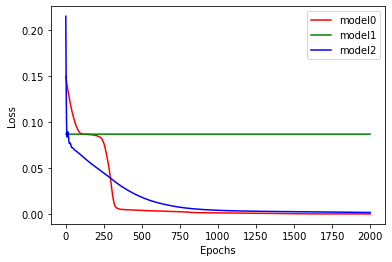

In [27]:
plt.plot(range(epochs),mod0_losses.numpy(),'r')
plt.plot(range(epochs),mod1_losses.numpy(),'g')
plt.plot(range(epochs),mod2_losses.numpy(),'b')
plt.legend(['model0','model1','model2'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

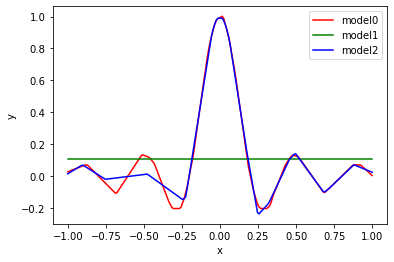

In [28]:
#Plotting all Models
plt.plot(X.numpy(), y_pred.detach().numpy(),'r')
plt.plot(X.numpy(), y_pred_mod1.detach().numpy(),'g')
plt.plot(X.numpy(), y_pred_mod2.detach().numpy(),'b')
plt.legend(['model0','model1','model2'])


plt.ylabel('y')
plt.xlabel('x');

In [29]:
##########################################-----HW 1-1(Model 0) Function-2 ---------############################################

In [30]:
import torch
import torch.nn as nn  
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
X1 = torch.linspace(-1,1,150).reshape(-1,1)

In [32]:
y1=np.sign(np.sin(5*np.pi*X1))

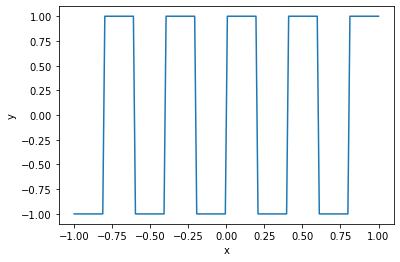

In [33]:
plt.plot(X1.numpy(), y1.numpy())

plt.ylabel('y')
plt.xlabel('x');


In [36]:
class Modelzf2(nn.Module):
    def __init__(self, in_features=1, h2=5, h3=10,h4=10,h5=10,h6=10,h7=10,h8=5, out_features=1):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h2)    # input layer
        self.fc2 = nn.Linear(h2, h3)
        self.fc3 = nn.Linear(h3, h4)
        self.fc4 = nn.Linear(h4, h5)
        self.fc5 = nn.Linear(h5, h6)
        self.fc6 = nn.Linear(h6, h7)
        self.fc7 = nn.Linear(h7, h8)
        self.out = nn.Linear(h8, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = self.out(x)
        return x

In [37]:
model_zero_f2=Modelzf2()

In [38]:
sum=0
for param in model_zero_f2.parameters():
    sum=sum+param.numel()
    
print("No of parameters in model =",sum)

No of parameters in model = 571


In [39]:
criterion = nn.MSELoss()

In [40]:
optimizer = torch.optim.Adam(model_zero_f2.parameters(), lr=0.001)

In [41]:
epochs = 2000
mod0_losses_f2 = []

for i in range(epochs):
    i+=1
    # forward step
    y_pred_mod0_f2 = model_zero_f2.forward(X1)
    
    # compute loss (error)
    loss = criterion(y_pred_mod0_f2, y1)
    
    # append loss to a list for plotting and analysis
    mod0_losses_f2.append(loss)
    
    # reset gadient at each epoch, because gradients are accumulating
    optimizer.zero_grad()
    # backprop the loss through the model and compute gradients
    loss.backward()
    # optimization step to upate weights and biases
    optimizer.step()

In [42]:
mod0_losses_f2=torch.tensor(mod0_losses_f2)

In [45]:
##########################################-----HW 1-1(Model 1) Function-2 ---------############################################

In [46]:
class Modelof2(nn.Module):
    def __init__(self, in_features=1, h2=10, h3=18,h4=15,h5=4, out_features=1):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h2)    # input layer
        self.fc2 = nn.Linear(h2, h3)
        self.fc3 = nn.Linear(h3, h4)
        self.fc4 = nn.Linear(h4, h5)
        self.out = nn.Linear(h5, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.out(x)
        return x

In [47]:
model_one_f2 = Modelof2()

In [48]:
sum=0
for param in model_one_f2.parameters():
    sum=sum+param.numel()
    
print("parameters =",sum)

parameters = 572


In [49]:
criterion = nn.MSELoss()

In [50]:
optimizer = torch.optim.Adam(model_one_f2.parameters(), lr=0.001)

In [51]:
epochs = 2000
mod1_losses_f2 = []

for i in range(epochs):
    i+=1
    # forward step
    y_pred_mod1_f2 = model_one_f2.forward(X1)
    
    # compute loss (error)
    loss = criterion(y_pred_mod1_f2, y1)
    
    # append loss to a list for plotting and analysis
    mod1_losses_f2.append(loss)
    
    # reset gadient at each epoch, because gradients are accumulating
    optimizer.zero_grad()
    # backprop the loss through the model and compute gradients
    loss.backward()
    # optimization step to upate weights and biases
    optimizer.step()

In [52]:
mod1_losses_f2=torch.tensor(mod1_losses_f2)

In [55]:
##########################################-----HW 1-1(Model 2) Function-2 ---------############################################

In [60]:
class Model2f2(nn.Module):
    def __init__(self, in_features=1, h2=190, out_features=1):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h2)   
        self.out = nn.Linear(h2, out_features) 
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.out(x)
        return x

In [61]:
model_two_f2 = Model2f2()

In [62]:
model_two_f2

Model2f2(
  (fc1): Linear(in_features=1, out_features=190, bias=True)
  (out): Linear(in_features=190, out_features=1, bias=True)
)

In [63]:
sum=0
for param in model_two_f2.parameters():
    sum=sum+param.numel()
    
print("parameters =",sum)

parameters = 571


In [64]:
criterion = nn.MSELoss()

In [65]:
optimizer = torch.optim.Adam(model_two_f2.parameters(), lr=0.001)

In [66]:
epochs = 2000
mod2_losses_f2 = []

for i in range(epochs):
    i+=1
    # forward step
    y_pred_mod2_f2 = model_two_f2.forward(X1)
    
    # compute loss (error)
    loss = criterion(y_pred_mod2_f2, y1)
    
    # append loss to a list for plotting and analysis
    mod2_losses_f2.append(loss)
    
    # reset gadient at each epoch, because gradients are accumulating
    optimizer.zero_grad()
    # backprop the loss through the model and compute gradients
    loss.backward()
    # optimization step to upate weights and biases
    optimizer.step()

In [67]:
mod2_losses_f2=torch.tensor(mod2_losses_f2)

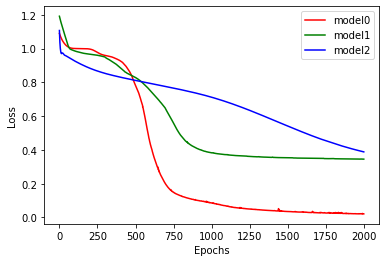

In [70]:
#x vs y_pred for all models using F2
plt.plot(range(epochs),mod0_losses_f2.numpy(),'r')
plt.plot(range(epochs),mod1_losses_f2.numpy(),'g')
plt.plot(range(epochs),mod2_losses_f2.numpy(),'b')
plt.legend(['model0','model1','model2'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

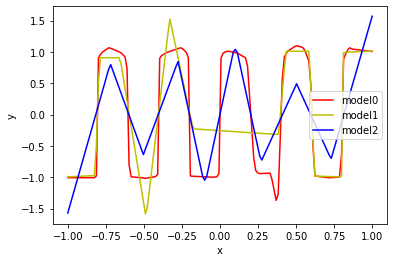

In [71]:
#Plotting all Models predicted values
plt.plot(X1.numpy(), y_pred_mod0_f2.detach().numpy(),'r')
plt.plot(X1.numpy(), y_pred_mod1_f2.detach().numpy(),'y')
plt.plot(X1.numpy(), y_pred_mod2_f2.detach().numpy(),'b')
plt.legend(['model0','model1','model2'])


plt.ylabel('y')
plt.xlabel('x');